KeyboardInterrupt: 

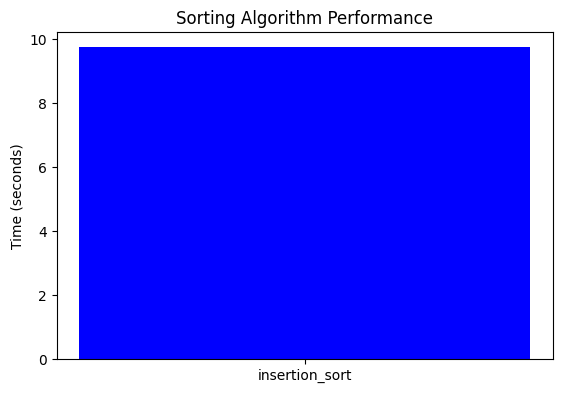

In [2]:
import tkinter as tk
import random
import time
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def draw_bars(canvas, arr, colors):
    canvas.delete("all")
    c_height = 300
    c_width = 600
    bar_width = c_width / len(arr)
    max_val = max(arr)
    for i, val in enumerate(arr):
        x0 = i * bar_width
        y0 = c_height - (val / max_val) * c_height
        x1 = (i + 1) * bar_width
        y1 = c_height
        canvas.create_rectangle(x0, y0, x1, y1, fill=colors[i], outline="black")
    canvas.update()

def bubble_sort(canvas, arr):
    n = len(arr)
    start_time = time.time()
    for i in range(n):
        for j in range(n - i - 1):
            colors = ["red" if x == j or x == j + 1 else "skyblue" for x in range(n)]
            draw_bars(canvas, arr, colors)
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
            time.sleep(0.1)
    draw_bars(canvas, arr, ["green" for _ in range(n)])
    return time.time() - start_time

def insertion_sort(canvas, arr):
    n = len(arr)
    start_time = time.time()
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
            colors = ["red" if x == j + 1 else "skyblue" for x in range(n)]
            draw_bars(canvas, arr, colors)
            time.sleep(0.1)
        arr[j + 1] = key
    draw_bars(canvas, arr, ["green" for _ in range(n)])
    return time.time() - start_time

def selection_sort(canvas, arr):
    n = len(arr)
    start_time = time.time()
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
            colors = ["red" if x == j or x == min_idx else "skyblue" for x in range(n)]
            draw_bars(canvas, arr, colors)
            time.sleep(0.1)
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    draw_bars(canvas, arr, ["green" for _ in range(n)])
    return time.time() - start_time

def start_sorting(sort_func, canvas, arr, results, analyzer_frame):
    time_taken = sort_func(canvas, arr.copy())
    results[sort_func.__name__] = time_taken
    update_analyzer(results, analyzer_frame)

def update_analyzer(results, analyzer_frame):
    for widget in analyzer_frame.winfo_children():
        widget.destroy()
    fig, ax = plt.subplots()
    ax.bar(results.keys(), results.values(), color=['blue', 'red', 'green'])
    ax.set_ylabel("Time (seconds)")
    ax.set_title("Sorting Algorithm Performance")
    canvas = FigureCanvasTkAgg(fig, master=analyzer_frame)
    canvas.get_tk_widget().pack()
    canvas.draw()

def main():
    global root
    root = tk.Tk()
    root.title("Sorting Visualizer & Analyzer 🎉")
    canvas = tk.Canvas(root, width=600, height=300, bg="white")
    canvas.pack()
    arr = [random.randint(10, 100) for _ in range(20)]
    draw_bars(canvas, arr, ["skyblue" for _ in range(len(arr))])
    results = {}
    analyzer_frame = tk.Frame(root)
    analyzer_frame.pack()
    tk.Button(root, text="Bubble Sort", command=lambda: start_sorting(bubble_sort, canvas, arr, results, analyzer_frame)).pack(side=tk.LEFT)
    tk.Button(root, text="Insertion Sort", command=lambda: start_sorting(insertion_sort, canvas, arr, results, analyzer_frame)).pack(side=tk.LEFT)
    tk.Button(root, text="Selection Sort", command=lambda: start_sorting(selection_sort, canvas, arr, results, analyzer_frame)).pack(side=tk.LEFT)
    tk.Button(root, text="Shuffle", command=lambda: draw_bars(canvas, random.sample(arr, len(arr)), ["skyblue"] * len(arr))).pack(side=tk.LEFT)
    root.mainloop()

if __name__ == "__main__":
    main()
